In [5]:
import ultralytics as ulytics 
from roboflow import Roboflow

In [6]:
rf = Roboflow(api_key="Qxs2g8ubl04BgGypIknI")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(1)
dataset = version.download("yolov5")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-1 in yolov5pytorch:: 100%|██████████| 1338/1338 [00:00<00:00, 4455.45it/s]


In [11]:
dataset.__dict__

{'name': 'football-players-detection',
 'version': '1',
 'model_format': 'yolov5pytorch',
 'location': '/Users/niranjan/Downloads/football_cv_project/training/football-players-detection-1'}

In [49]:
from pathlib import Path
import shutil

base_path = Path('football-players-detection-1')

for dir in [d for d in base_path.iterdir() if d.is_dir()]:
   shutil.move(str(dir),str(base_path)+'/'+str(dir))


!yolo task=detect mode=train model=yolov5x.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

In [1]:
import cv2

def read_video(input_video_path):
    frames = []
    cap = cv2.VideoCapture(input_video_path)
    while True:
        ret,frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    return frames

In [2]:
input_video_path = '/Users/niranjan/Downloads/football_cv_project/input_videos/bundesliga.mp4'
frames = read_video(input_video_path)






In [4]:
len(frames)

750

In [5]:
frames[0].shape

(1080, 1920, 3)

In [ ]:
cv2.VideoCapture()

In [13]:
def save_video(frames, output_path):
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 24.0, (width, height))
    for frame in frames:
        out.write(frame)

    out.release()

In [14]:
save_video(frames,'output_video.avi')

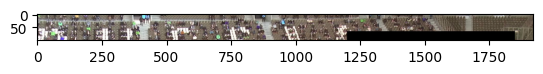

In [8]:
from matplotlib import pyplot as plt
plt.imshow(frames[0][:100,:])

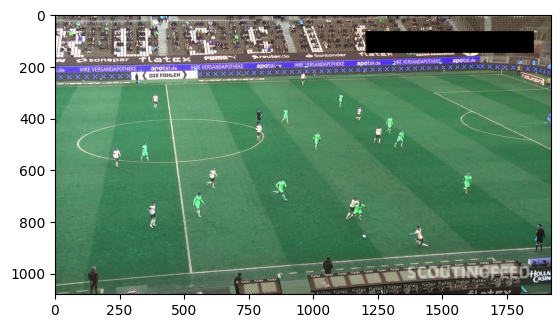

In [12]:
plt.imshow(frames[0][:,:])

In [15]:
input_video_path = '/Users/niranjan/Downloads/football_cv_project/training/output_video.avi'
frames = read_video(input_video_path)






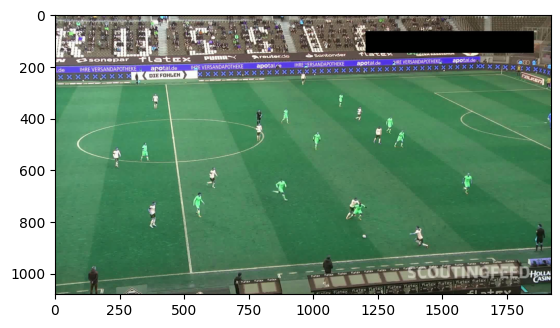

In [16]:
plt.imshow(frames[0][:,:])

In [17]:
frames[0].shape

(1080, 1920, 3)

In [18]:
len(frames)

750